In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic=sns.load_dataset('titanic')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = train
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

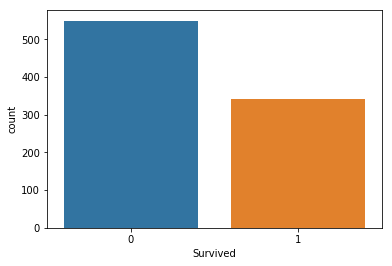

In [4]:
sns.countplot(df.Survived)

In [5]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [6]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [7]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [8]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

/Users/learny/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


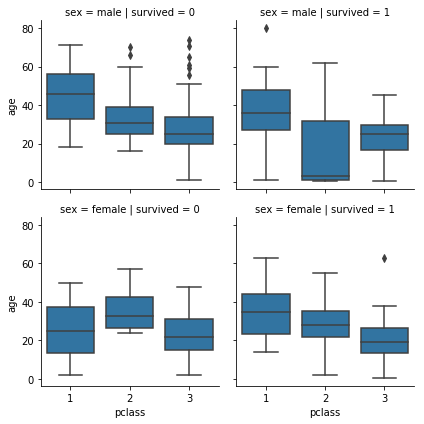

In [9]:
g = sns.FacetGrid(titanic, col='survived', row='sex')
g.map(sns.boxplot, "pclass", "age")

/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/learny/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/learny/anaconda3/lib/pyth

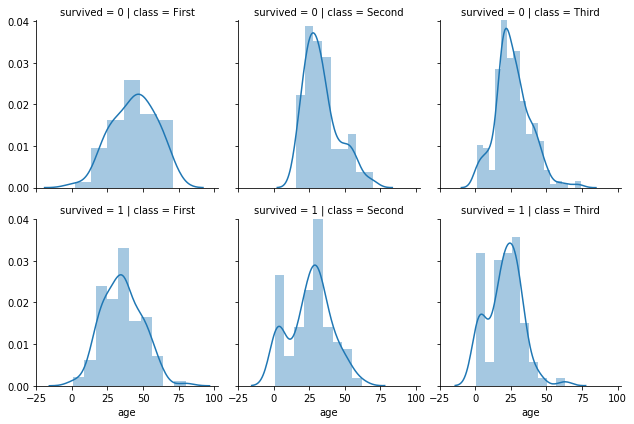

In [10]:
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")

In [11]:
grouped = titanic.groupby(["who", "pclass"])
survival_ratio = grouped["survived"].mean()

gender = ["child", "man","woman"]
Pclass = [1, 2, 3]

for i in range(len(gender)):
   for j in range(len(Pclass)):
       print ("Class {}, {} survival ratio: {:.2f}".format(Pclass[j], 
           gender[i].title(), survival_ratio[gender[i], Pclass[j]]))

Class 1, Child survival ratio: 0.83
Class 2, Child survival ratio: 1.00
Class 3, Child survival ratio: 0.43
Class 1, Man survival ratio: 0.35
Class 2, Man survival ratio: 0.08
Class 3, Man survival ratio: 0.12
Class 1, Woman survival ratio: 0.98
Class 2, Woman survival ratio: 0.91
Class 3, Woman survival ratio: 0.49


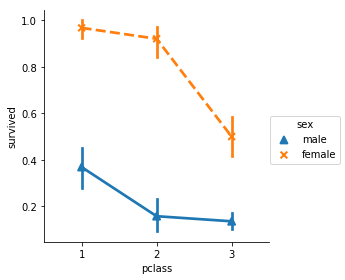

In [12]:
sns.factorplot(x="pclass", y="survived", kind="point", 
              hue="sex", data=titanic,
              markers=["^", "x"], linestyles=["-", "--"])

In [13]:
count1 = titanic.groupby(["who", "pclass", "embark_town"])
count1["survived"].mean()

who    pclass  embark_town
child  1       Southampton    0.833333
       2       Cherbourg      1.000000
               Southampton    1.000000
       3       Cherbourg      0.733333
               Queenstown     0.200000
               Southampton    0.342105
man    1       Cherbourg      0.404762
               Queenstown     0.000000
               Southampton    0.328947
       2       Cherbourg      0.111111
               Queenstown     0.000000
               Southampton    0.078652
       3       Cherbourg      0.205128
               Queenstown     0.085714
               Southampton    0.110204
woman  1       Cherbourg      0.976744
               Queenstown     1.000000
               Southampton    0.977778
       2       Cherbourg      1.000000
               Queenstown     1.000000
               Southampton    0.898305
       3       Cherbourg      0.500000
               Queenstown     0.718750
               Southampton    0.385714
Name: survived, dtype: float64

In [14]:
count = titanic.groupby(["who", "pclass", "survived"])
count.apply(len)

who    pclass  survived
child  1       0             1
               1             5
       2       1            19
       3       0            33
               1            25
man    1       0            77
               1            42
       2       0            91
               1             8
       3       0           281
               1            38
woman  1       0             2
               1            89
       2       0             6
               1            60
       3       0            58
               1            56
dtype: int64

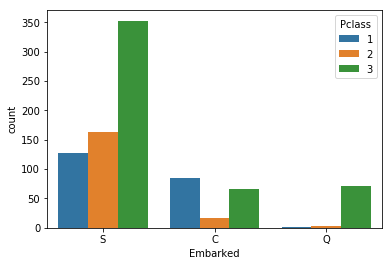

In [15]:
train['Embarked'].value_counts()
train['Embarked'].value_counts(normalize=True)
train['Survived'].groupby(train['Embarked']).mean()
sns.countplot(train['Embarked'], hue=train['Pclass'])

In [16]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Jonkheer.      1
Lady.          1
Ms.            1
Don.           1
Capt.          1
Mme.           1
the            1
Sir.           1
Name: Name_Title, dtype: int64

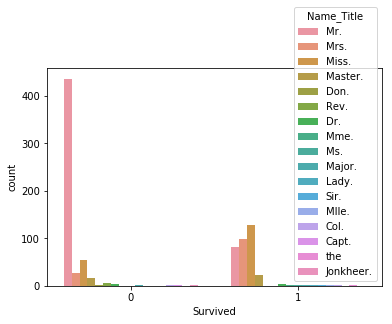

In [17]:
train['Survived'].groupby(train['Name_Title']).count()
sns.countplot(train['Survived'], hue=train['Name_Title'])

In [18]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [19]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [20]:

def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [21]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [22]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [23]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [24]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [25]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [26]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [27]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [28]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


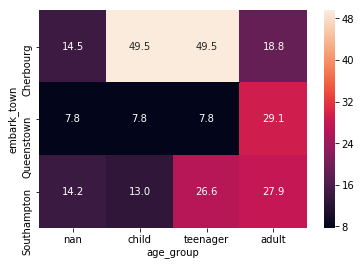

In [30]:
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
age_groups = pd.cut(titanic.age, bins, labels=labels)
titanic['age_group'] = age_groups
groups = titanic.groupby(['age_group', 'alone'])
df = titanic.pivot_table(index='embark_town', columns='age_group', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")